In [162]:
import pandas as pd
import numpy as np
import copy
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [163]:
filepath = '/home/user/Desktop/env2/VAR/macro/macro_analysis_TIIE.xlsx'
df = pd.read_excel(filepath)
##########for the plot only
# df1=df[["Date","Libor 1M","BGCR Repo rates"]]
# df1.dropna(inplace=True)
# df1.index=df1['Date']
# df1=df1.drop(['Date'],axis=1)
##########upto this
####### For further analysis
df=df[["Date","TIIE monthly Avg","Inflation","Short term treasury interest rates","GDP"]]
# df=df[["Date","Libor 1M","BGCR Repo rates"]]
# df.dropna(inplace=True)
df.index=df['Date']
df=df.drop(['Date'],axis=1)
df.tail()

,TIIE monthly Avg,Inflation,Short term treasury interest rates,GDP
Date,,,,
01.12.2020,4.485686,3.150074,4.27,6352256595000
01.01.2021,4.468395,3.535093,4.22,6477349057500
01.02.2021,4.367320,3.759040,4.12,6602441520000
01.03.2021,4.283383,4.666879,4.05,6727533982500
01.04.2021,4.287875,4.666879,4.05,6852626445000


Text(0.5, 1.0, 'PLOT OF TIIE MONTHLY AVERAGE AGAINST GDP')

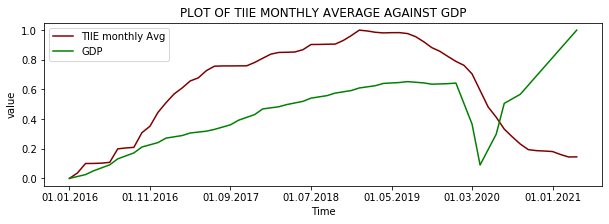

In [113]:
df_min_max_scaled = df.copy()
#df1_min_max_scaled=df1.copy()
# apply normalization techniques by Column 1
columns=df_min_max_scaled.columns
#columns1=df1_min_max_scaled.columns
for col in columns:
    df_min_max_scaled[col] = (df_min_max_scaled[col] - df_min_max_scaled[col].min()) / (df_min_max_scaled[col].max() - df_min_max_scaled[col].min())    
# for col in columns1:
#     df1_min_max_scaled[col] = (df1_min_max_scaled[col] - df1_min_max_scaled[col].min()) / (df1_min_max_scaled[col].max() - df1_min_max_scaled[col].min())    

plt.rcParams["figure.figsize"] = (10,3)
df_min_max_scaled["TIIE monthly Avg"].plot(color="maroon",legend=True)
df_min_max_scaled["GDP"].plot(color="green",legend=True)
#df_min_max_scaled["Interest Rates"].plot(color="cyan",legend=True)
#plt.xticks([1-1-2016,1-1-2021])
plt.xlabel("Time")
plt.ylabel("value")
plt.title("PLOT OF TIIE MONTHLY AVERAGE AGAINST GDP")
    
    
    
    
# cols=list(df.columns)[1:]
# cols1=list(df1.columns[1:])
# view normalized data
#display(df1_min_max_scaled)
# plt.rcParams["figure.figsize"] = (20,10)
# fig, ax = plt.subplots(4,2)
# plt.suptitle("PLOT OF DIFFERENT MACRO VARIABLES WITH LIBOR MONTHLY AVERAGE DATA", fontsize=14)
# fig.delaxes(ax[3,1])
# c=0
# for i in range(4):
#     for j in range(2):
#         if c<=len(cols)-1:
#             ax[i,j].plot(df_min_max_scaled["Libor 1M"])
#             ax[i,j].plot(df_min_max_scaled[cols[c]])
#             ax[i,j].legend(["LIBOR 1M",cols[c]])
#             ax[i,j].set_xticks(["01-03-2016","01-03-2017","01-03-2018","01-03-2019","01-03-2020","01-03-2021"])
#             ax[i,j].set_xlabel("Time")
#             ax[i,j].set_ylabel("Value")
#             c=c+1
#         else:
#             ax[i,j].plot(df1_min_max_scaled["Libor 1M"])
#             ax[i,j].plot(df1_min_max_scaled[cols1])
#             ax[i,j].legend(["LIBOR 1M",cols1])
#             ax[i,j].set_xticks(["01-04-2018","01-03-2019","01-03-2020","01-03-2021"])
#             ax[i,j].set_xlabel("Time")
#             ax[i,j].set_ylabel("Value")

In [164]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["Inflation"], df["TIIE monthly Avg"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.454


In [165]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["Short term treasury interest rates"], df["TIIE monthly Avg"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.998


In [166]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["GDP"], df["TIIE monthly Avg"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.351


In [51]:
#df["Inflation_lag1"]=df["Inflation"].shift(-1)
#df["Inflation_lag2"]=df["Inflation"].shift(-2)
df["Inflation_lag3"]=df["Inflation"].shift(-3)
df.dropna(inplace=True)
df.tail()

,TIIE monthly Avg,Inflation,Short term treasury interest rates,GDP,Inflation_lag3
Date,,,,,
01.09.2020,4.721455,4.013777,4.38,5976979207500,3.150074
01.10.2020,4.532459,4.086964,4.20,6102071670000,3.535093
01.11.2020,4.499148,3.331878,4.23,6227164132500,3.759040
01.12.2020,4.485686,3.150074,4.27,6352256595000,4.666879
01.01.2021,4.468395,3.535093,4.22,6477349057500,4.666879


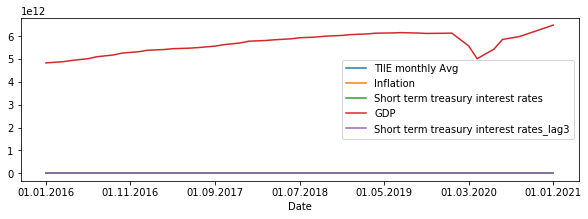

In [98]:
#df["Short term treasury interest rates_lag1"]=df["Short term treasury interest rates"].shift(-1)
#df["Short term treasury interest rates_lag2"]=df["Short term treasury interest rates"].shift(-2)
df["Short term treasury interest rates_lag3"]=df["Short term treasury interest rates"].shift(-3)
df.dropna(inplace=True)
df.tail()

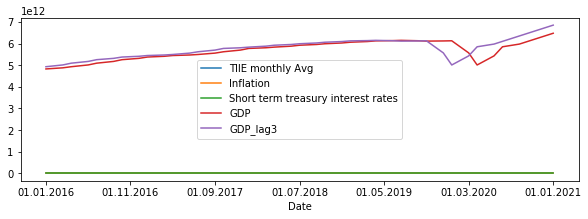

In [145]:
#df["GDP_lag1"]=df["GDP"].shift(-1)
#df["GDP_lag2"]=df["GDP"].shift(-2)
df["GDP_lag3"]=df["GDP"].shift(-3)
df.dropna(inplace=True)
df.tail()

In [146]:
# df=df[["Libor 1M","Inflation"]]
df=df[["TIIE monthly Avg","GDP_lag3"]]
df.tail()

,TIIE monthly Avg,GDP_lag3
Date,,
01.09.2020,4.721455,6.352257e+12
01.10.2020,4.532459,6.477349e+12
01.11.2020,4.499148,6.602442e+12
01.12.2020,4.485686,6.727534e+12
01.01.2021,4.468395,6.852626e+12


In [147]:
#GRANGER'S CAUSALITY TEST TO DETERMINE THE PRESENCE OF RELATIONSHIPS BETWEEN TIME SERIES.
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            print(p_values)
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0276, 0.4823, 0.6108, 0.1253, 0.4268, 0.3221, 0.1985, 0.3057, 0.1907, 0.4634]
[0.0219, 0.2431, 0.1077, 0.007, 0.0019, 0.0015, 0.0001, 0.0002, 0.0001, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


/home/user/Desktop/env2/lib/python3.6/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/home/user/Desktop/env2/lib/python3.6/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/home/user/Desktop/env2/lib/python3.6/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/home/user/Desktop/env2/lib/python3.6/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/home/user/Desktop/env2/lib/python3.6/site-packages/statsmod

,TIIE monthly Avg_x,GDP_lag3_x
TIIE monthly Avg_y,1.0000,0.0
GDP_lag3_y,0.0276,1.0


In [148]:
#TRAIN-TEST SPLIT

nobs = int(0.1*len(df))
print(nobs)
df_train, df_test = df.iloc[:-nobs,:], df.iloc[-nobs:,:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

6
(55, 2)
(6, 2)


In [149]:
#AUGMENTED DICKEY-FULLER TEST FOR STATIONARITY

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
          
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TIIE monthly Avg" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.6715
 No. Lags Chosen       = 11
 Critical value 1%     = -3.593
 Critical value 5%     = -2.932
 Critical value 10%    = -2.604
 => P-Value = 0.9981. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GDP_lag3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.872
 No. Lags Chosen       = 6
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.3453. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [150]:
# 1st difference
df_differenced = df_train.diff().dropna()
df_diff=pd.DataFrame()
columns=df_train.columns
for col in columns:
    
    df_diff[str(col)+"difference1"]=df_train[str(col)].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TIIE monthly Avg" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.9604
 No. Lags Chosen       = 10
 Critical value 1%     = -3.593
 Critical value 5%     = -2.932
 Critical value 10%    = -2.604
 => P-Value = 0.9938. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GDP_lag3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.2287
 No. Lags Chosen       = 5
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.0184. Rejecting Null Hypothesis.
 => Series is Stationary.




In [151]:
# 2nd difference
df_differenced = df_differenced.diff().dropna()
for col in columns:
    
    df_diff[str(col)+"difference2"]=df_diff[str(col)+"difference1"].diff()
# df_diff["difference2"]=df_diff["difference1"].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TIIE monthly Avg" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.4823
 No. Lags Chosen       = 5
 Critical value 1%     = -3.578
 Critical value 5%     = -2.925
 Critical value 10%    = -2.601
 => P-Value = 0.0085. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP_lag3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.5396
 No. Lags Chosen       = 7
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.




In [41]:
# 3rd difference
df_differenced = df_differenced.diff().dropna()
for col in columns:
    
    df_diff[str(col)+"difference3"]=df_diff[str(col)+"difference2"].diff()
#df_diff["difference3"]=df_diff["difference2"].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TIIE monthly Avg" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5899
 No. Lags Chosen       = 4
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Inflation_lag2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7822
 No. Lags Chosen       = 10
 Critical value 1%     = -3.597
 Critical value 5%     = -2.933
 Critical value 10%    = -2.605
 => P-Value = 0.0609. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [42]:
# 4th difference
df_differenced = df_differenced.diff().dropna()
for col in columns:
    
    df_diff[str(col)+"difference4"]=df_diff[str(col)+"difference3"].diff()
#df_diff["difference3"]=df_diff["difference2"].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TIIE monthly Avg" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.3777
 No. Lags Chosen       = 7
 Critical value 1%     = -3.589
 Critical value 5%     = -2.93
 Critical value 10%    = -2.603
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Inflation_lag2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.1727
 No. Lags Chosen       = 9
 Critical value 1%     = -3.597
 Critical value 5%     = -2.933
 Critical value 10%    = -2.605
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [152]:
#FIT THE VAR MODEL

model = VAR(df_differenced)

/home/user/Desktop/env2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/user/Desktop/env2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [153]:
#TRAINING THE MODEL

model_fitted = model.fit(3)  #place the lag value as parameter
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 12, May, 2021
Time:                     11:47:29
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    47.5868
Nobs:                     50.0000    HQIC:                   47.2553
Log likelihood:          -1304.18    FPE:                2.72750e+20
AIC:                      47.0514    Det(Omega_mle):     2.09872e+20
--------------------------------------------------------------------
Results for equation TIIE monthly Avg
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                      -0.022124         0.018504           -1.196           0.232
L1.TIIE monthly Avg        -0.625480         0.148375           -4.216           0.000
L1.GDP_lag3              

In [154]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
print(df_differenced)
forecast_input = df_differenced.values[-lag_order:]
forecast_input

3
            TIIE monthly Avg      GDP_lag3
Date                                      
01.03.2016          0.136642  0.000000e+00
01.04.2016         -0.319800  4.085326e+10
01.05.2016          0.008580 -4.135125e+10
01.06.2016          0.016702  0.000000e+00
01.07.2016          0.431724  4.035528e+10
01.08.2016         -0.427921 -5.023774e+10
01.09.2016         -0.010787  0.000000e+00
01.10.2016          0.478412  3.047283e+10
01.11.2016         -0.278919 -4.344322e+10
01.12.2016          0.252945  0.000000e+00
01.01.2017         -0.143654  1.750244e+10
01.02.2017         -0.032545 -2.282077e+10
01.03.2017         -0.092848  0.000000e+00
01.04.2017          0.034672  1.218411e+10
01.05.2017         -0.133883  7.000626e+09
01.06.2017          0.140698  0.000000e+00
01.07.2017         -0.093276  3.136884e+10
01.08.2017         -0.142015 -2.421701e+10
01.09.2017         -0.008813  0.000000e+00
01.10.2017          0.001901  3.852068e+10
01.11.2017         -0.001921 -6.203696e+10
01.12.201

array([[ 2.91219650e-04, -3.58222834e+11],
       [ 2.13331710e-01,  0.00000000e+00],
       [-5.54876430e-02,  6.25462312e+10]])

In [155]:
# Forecast
od=2  #order of difference to make it stationary
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_'+str(od)+'d')
df_forecast

,TIIE monthly Avg_2d,GDP_lag3_2d
Date,,
01.08.2020,-0.066192,2.138186e+11
01.09.2020,-0.098345,-1.294308e+10
01.10.2020,-0.011640,-3.658916e+10
01.11.2020,0.038768,-1.220175e+11
01.12.2020,0.034984,2.956343e+10
01.01.2021,-0.013958,2.518654e+10


In [156]:
#INVERT TRANSFORMATION TO GET REAL FORECAST
def invert(ori,diff_data):
    last_val=ori[-1]
    data=[]
    for idx,i in enumerate(diff_data):
        #print(idx,i+last_val)
        last_val+=i
        data.append(last_val)
    #print(len(data))
    return data

def invert_transformation(df_train, df_forecast,df_diff, difference):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        if difference==4:
            df_fc[str(col)+"_3d"]=invert(list(df_diff[str(col)+"difference3"].values),list(df_fc[str(col)+"_4d"].values))
            df_fc[str(col)+"_2d"]=invert(list(df_diff[str(col)+"difference2"].values),list(df_fc[str(col)+"_3d"].values))
            df_fc[str(col)+"_1d"]=invert(list(df_diff[str(col)+"difference1"].values),list(df_fc[str(col)+"_2d"].values))
            df_fc[str(col)+" forecast"]=invert(list(df_train[str(col)].values),list(df_fc[str(col)+"_1d"].values)) 
        if difference==3:
            df_fc[str(col)+"_2d"]=invert(list(df_diff[str(col)+"difference2"].values),list(df_fc[str(col)+"_3d"].values))
            df_fc[str(col)+"_1d"]=invert(list(df_diff[str(col)+"difference1"].values),list(df_fc[str(col)+"_2d"].values))
            df_fc[str(col)+" forecast"]=invert(list(df_train[str(col)].values),list(df_fc[str(col)+"_1d"].values)) 
        # Roll back 2nd Diff
        if difference==2:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
            # Roll back 1st Diff
            df_fc[str(col)+' forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
        elif difference==1:
            df_fc[str(col)+' forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
        elif difference==0:
            df_fc[str(col)+' forecast']=df_fc[str(col)+'_0d']
    return df_fc



df_results_all = invert_transformation(df_train, df_forecast,df_diff, od)
df_results=copy.deepcopy(df_results_all)
columns=df_results_all.columns
for col in columns:
    if len(col.split())==1:
        df_results.drop(col,axis=1,inplace=True)
print(df_results)
# df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
#                    'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

            TIIE monthly Avg_2d  TIIE monthly Avg_1d  \
Date                                                   
01.08.2020            -0.066192            -0.469712   
01.09.2020            -0.098345            -0.568056   
01.10.2020            -0.011640            -0.579697   
01.11.2020             0.038768            -0.540929   
01.12.2020             0.034984            -0.505945   
01.01.2021            -0.013958            -0.519902   

            TIIE monthly Avg forecast  GDP_lag3 forecast  
Date                                                      
01.08.2020                   4.761758       6.440983e+12  
01.09.2020                   4.193702       6.766951e+12  
01.10.2020                   3.614005       7.056330e+12  
01.11.2020                   3.073077       7.223691e+12  
01.12.2020                   2.567132       7.420616e+12  
01.01.2021                   2.047230       7.642727e+12  


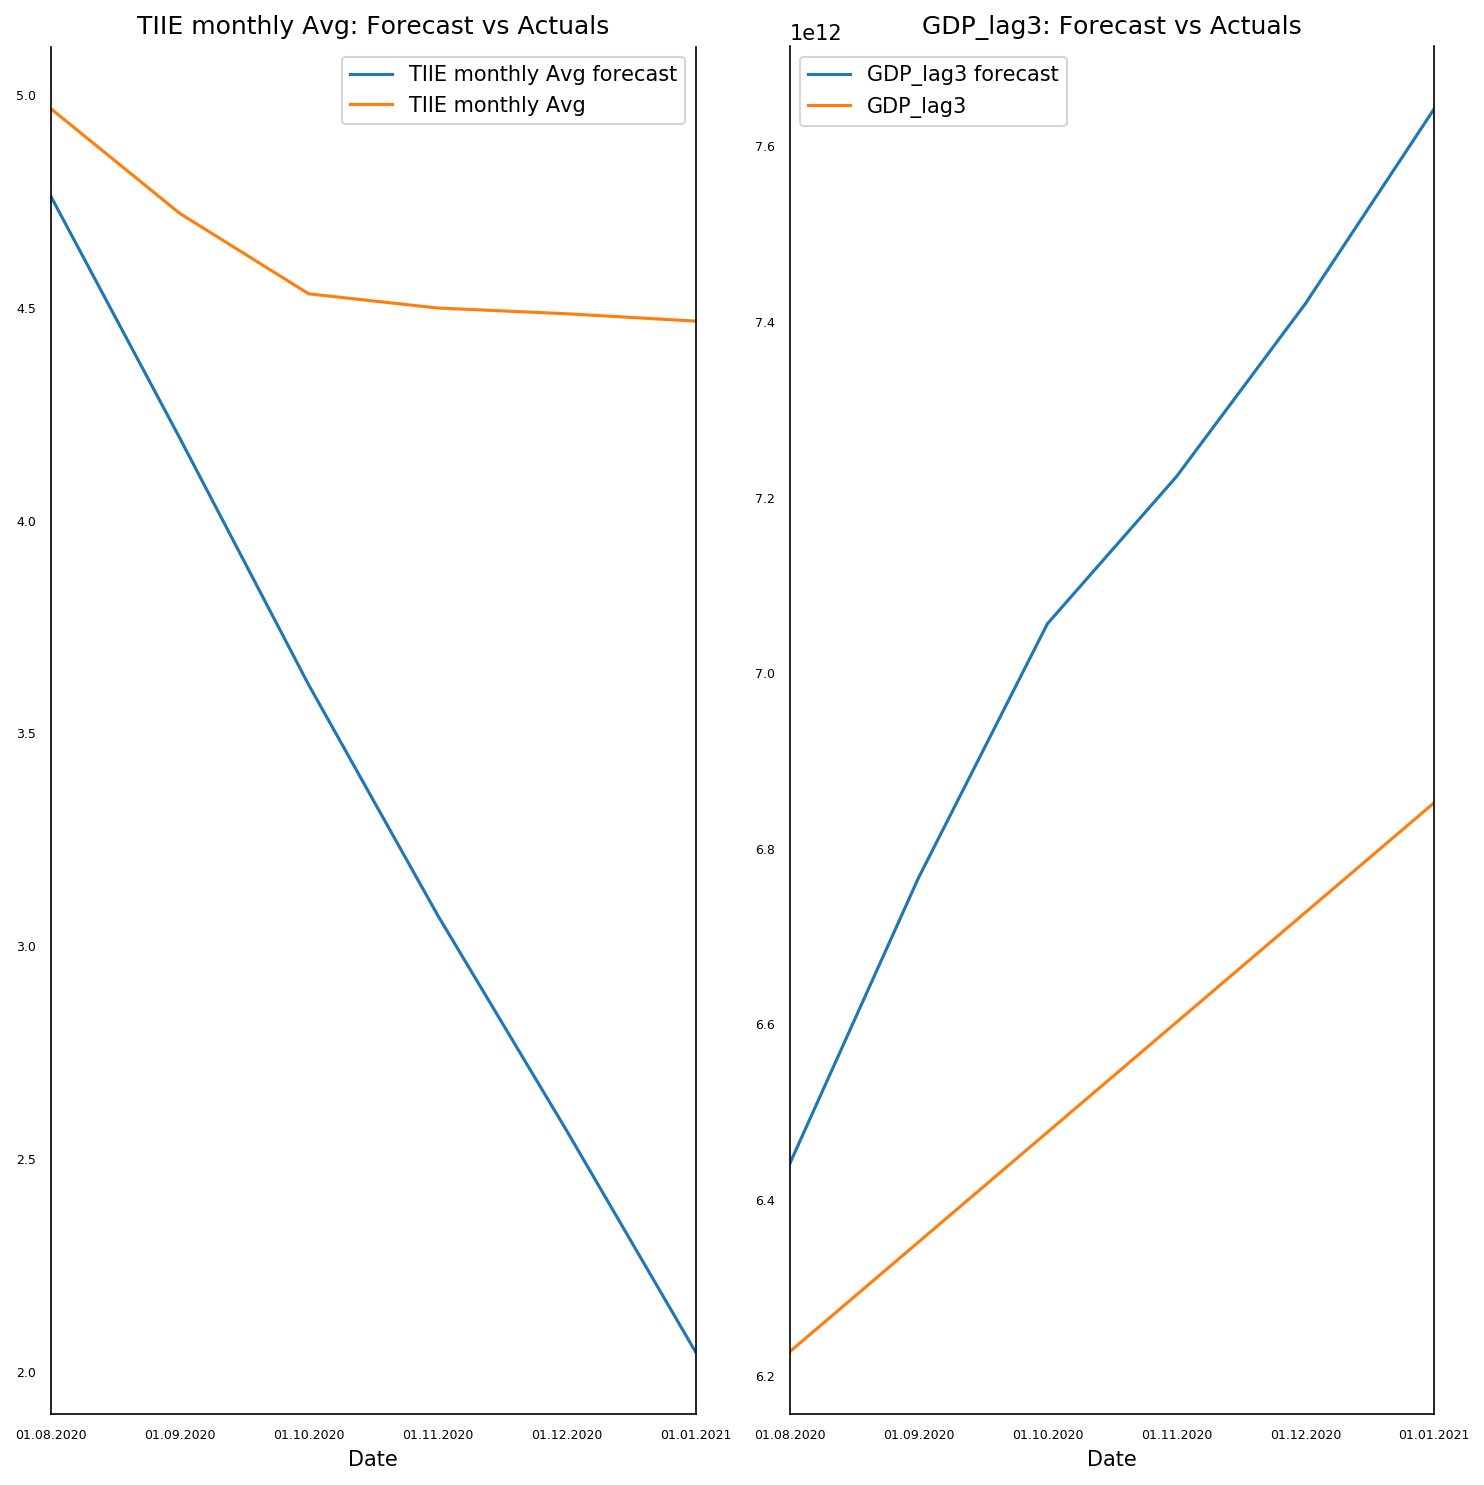

In [157]:
#PLOT OF ACTUAL VS FORECAST

fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+' forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [158]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'rmse':rmse})
columns=df_train.columns
for col in columns:
    print('Forecast Accuracy of: '+str(col))
    accuracy_prod = forecast_accuracy(df_results[str(col)+' forecast'].values, df_test[str(col)])
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))


Forecast Accuracy of: TIIE monthly Avg
rmse :  1.4572
Forecast Accuracy of: GDP_lag3
rmse :  583592358261.8081
